<a href="https://colab.research.google.com/github/tamzid1984/ML/blob/main/Tamzid_predicting_heart_disease_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Classification

# 1.1 Classifications Explained: 

The Central Statistics Office has a statutory role in the co-ordination of official statistics in Ireland. In particular, it has the authority to ensure that appropriate standard classifications are used for this purpose. To this end, the Statistics Act 1993, 10(2), states that ’The Office (viz. Central Statistics Office) shall have authority to co-ordinate official statistics compiled by public authorities to ensure, in particular, adherence to statistical standards and the use of appropriate classifications.

A classification is an ordered set of related categories used to group data according to its similarities. It consists of codes and descriptors and allows survey responses to be put into meaningful categories in order to produce useful data. A classification is a useful tool for anyone developing statistical surveys. It is a framework which both simplifies the topic being studied and makes it easy to categorise all data or responses received.

# 1.2 Features of a classification
It is generally accepted that a standard classification will usually meet a number of requirements which are outlined below.

Exhaustive categories  - All survey responses need to fit into the classification structure somewhere
Precise and meaningful descriptors for categories - The content of each category in the classification should be clearly defined
Conceptually sound - The classification should have a conceptual basis and a logical structure
Statistically balanced - In general, survey responses should not fall heavily into one category and sparsely into the other categories
Operationally feasible - There is no point in having a classification that cannot be implemented in practice
Statistically robust - The classification should be able to be used for a number of years without revision
Internationally comparable - The classification should be comparable with any international standard classification

###  <u><b>More specifically, we'll look at the following topics.</b></u>

   ### <b style="color:blue">1. Exploratory data analysis (EDA)</b> - the process of going through a dataset and finding out more about it.
   
   ### <b style="color:blue">2. Model training</b>  - create model(s) to learn to predict a target variable based on other variables.
   
   ### <b style="color:blue">3. Model evaluation</b>  - evaluating a models predictions using problem-specific evaluation metrics. 
   
   ### <b style="color:blue">4. Model comparison</b>  - comparing several different models to find the best one.
   
   ### <b style="color:blue">5. Model fine-tuning</b>  - once we've found a good model, how can we improve it?
   
   ### <b style="color:blue">6. Feature importance</b>  - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
   
   ### <b style="color:blue">7. Cross-validation</b>  - if we do build a good model, can we be sure it will work on unseen data?
   
   ### <b style="color:blue">8. Reporting what we've found</b>  - if we had to present our work, what would we show someone?


# 1.3 Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

   <b style="color:blue">1. age</b> - age in years 
   
   <b style="color:blue">2. sex</b> - (1 = male; 0 = female) 
   
   <b style="color:blue">3. cp</b> - chest pain type 
     * 0: Typical angina: chest pain related decrease blood supply to the heart
     * 1: Atypical angina: chest pain not related to heart
     * 2: Non-anginal pain: typically esophageal spasms (non heart related)
     * 3: Asymptomatic: chest pain not showing signs of disease
     
   <b style="color:blue">4. trestbps</b> - resting blood pressure (in mm Hg on admission to the hospital)
     * anything above 130-140 is typically cause for concern
     
   <b style="color:blue">5. chol</b> - serum cholestoral in mg/dl 
     * serum = LDL + HDL + .2 * triglycerides
     * above 200 is cause for concern
     
   <b style="color:blue">6. fbs</b> - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
     * '>126' mg/dL signals diabetes
     
   <b style="color:blue">7. restecg</b> - resting electrocardiographic results
     * 0: Nothing to note
     * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
     * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
        
   <b style="color:blue">8. thalach</b> - maximum heart rate achieved 
   
   <b style="color:blue">9. exang</b> - exercise induced angina (1 = yes; 0 = no) 
   
   <b style="color:blue">10. oldpeak</b> - ST depression induced by exercise relative to rest 
     * looks at stress of heart during excercise
     * unhealthy heart will stress more
     
   <b style="color:blue">11. slope</b> - the slope of the peak exercise ST segment
     * 0: Upsloping: better heart rate with excercise (uncommon)
     * 1: Flatsloping: minimal change (typical healthy heart)
     * 2: Downslopins: signs of unhealthy heart
     
   <b style="color:blue">12. ca</b> - number of major vessels (0-3) colored by flourosopy 
     * colored vessel means the doctor can see the blood passing through
     * the more blood movement the better (no clots)
     
   <b style="color:blue">13. thal</b> - thalium stress result
     * 1,3: normal
     * 6: fixed defect: used to be defect but ok now
     * 7: reversable defect: no proper blood movement when excercising 
     
   <b style="color:blue">14. target</b> - have disease or not (1=yes, 0=no) (= the predicted attribute)


<img src="https://img.grepmed.com/uploads/6940/management-hfref-dapagliflozin-sglt2inhibitor-cardiology-32-original.png" alt="CLS">

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S1386505617303684-gr2.jpg" alt="Process">

# 2. Import lnecessary ibraries python

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.1 Load DataSet

In [3]:
heart_dataset = pd.read_csv('drive/MyDrive/Healthcare/heart.csv')
heart_dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 2.2 Target of the Dataset

In [5]:
heart_dataset.output.value_counts()

1    165
0    138
Name: output, dtype: int64

# 2.2.1 Normalize the target value

In [6]:
heart_dataset.output.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: output, dtype: float64

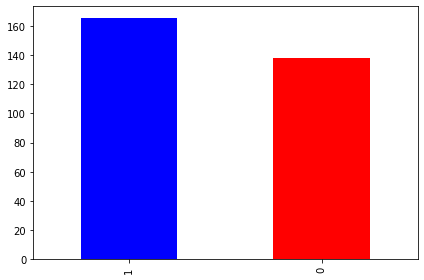

In [7]:
heart_dataset.output.value_counts().plot(kind = 'bar', color = ["blue", 'red'])
plt.tight_layout()
plt.show()

# 2.3 Compare Target columns with Sex column

## <b style="color:blue">what does pd.crosstab() do?</b>
### crosstab. Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

In [8]:
pd.crosstab(heart_dataset.output, heart_dataset.sex)

sex,0,1
output,,
0,24,114
1,72,93


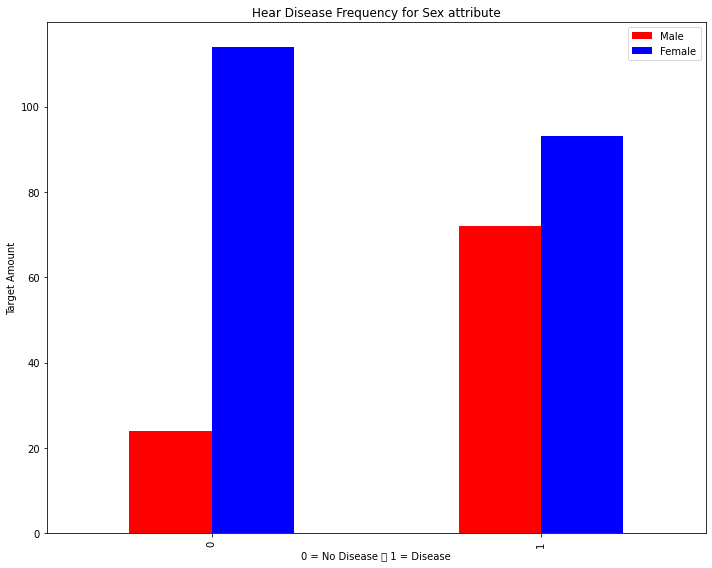

In [9]:
pd.crosstab(heart_dataset.output, heart_dataset.sex).plot(kind ='bar',
                                                         figsize = (10, 8),
                                                         color = ["red","blue"])
plt.title("Hear Disease Frequency for Sex attribute")
plt.xlabel("0 = No Disease \t 1 = Disease")
plt.ylabel("Target Amount")
plt.legend(["Male", "Female"])
plt.tight_layout()
plt.show()

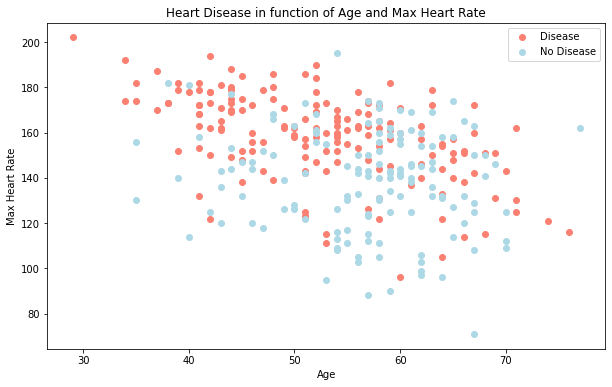

In [10]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(heart_dataset.age[heart_dataset.output==1], 
            heart_dataset.thalachh[heart_dataset.output==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(heart_dataset.age[heart_dataset.output==0], 
            heart_dataset.thalachh[heart_dataset.output==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

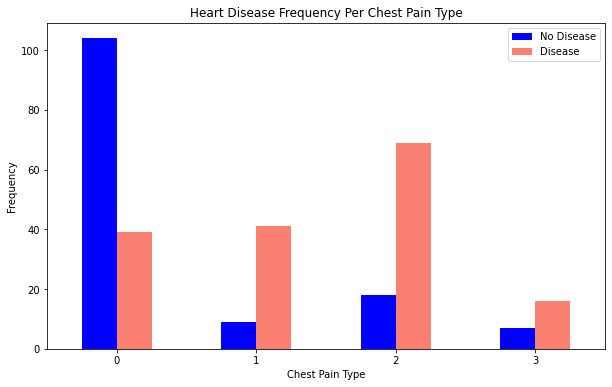

In [11]:
# Create a new crosstab and base plot
pd.crosstab(heart_dataset.cp, heart_dataset.output).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["blue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

# 3. Correlation

## <b style="color:blue">3.1 Definition</b>
Correlation is used to test relationships between quantitative variables or categorical variables. In other words, it’s a measure of how things are related. The study of how variables are correlated is called correlation analysis.

## <b style="color:blue">3.2 Some examples of data that have a high correlation:</b>

   * Your caloric intake and your weight.
   * Your eye color and your relatives’ eye colors.
   * The amount of time your study and your GPA.
   
## <b style="color:blue">3.3 Some examples of data that have a low correlation (or none at all):</b>

   * Your sexual preference and the type of cereal you eat.
   * A dog’s name and the type of dog biscuit they prefer.
   * The cost of a car wash and how long it takes to buy a soda inside the station.
   
## <b style="color:blue">Types</b>
The most common correlation coefficient is the Pearson Correlation Coefficient. It’s used to test for linear relationships between data. In AP stats or elementary stats, the Pearson is likely the only one you’ll be working with. However, you may come across others, depending upon the type of data you are working with. For example, Goodman and Kruskal’s lambda coefficient is a fairly common coefficient. It can be symmetric, where you do not have to specify which variable is dependent, and asymmetric where the dependent variable is specified.

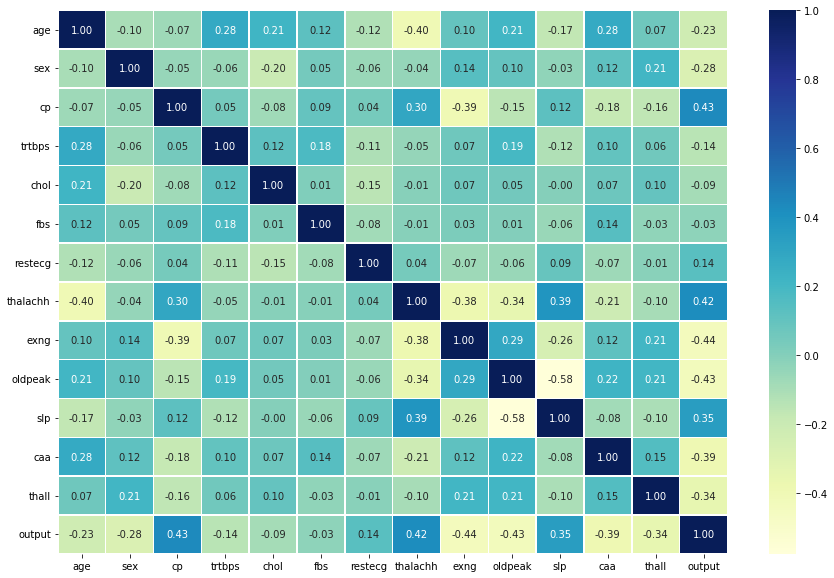

In [12]:
corr_matrix = heart_dataset.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

# 4. Create Heart Disease Diagnosis Model

## 4.1 Independent Variables 

In [13]:
X = heart_dataset.drop('output', axis = 1)


## 4.2 Dependent Varialbes

In [14]:
y = heart_dataset.output.values

## 4.3 Train - Test Split 

In [15]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

## 4.4 Model Selection

In [16]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

## 4.5 Find out the model score

In [17]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

# 5. Comparison The All Models Score

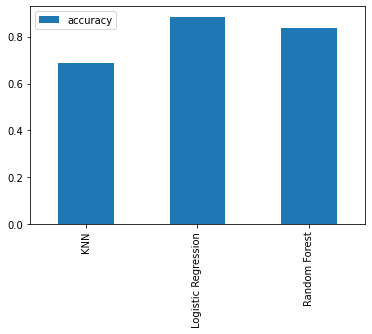

In [18]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [19]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


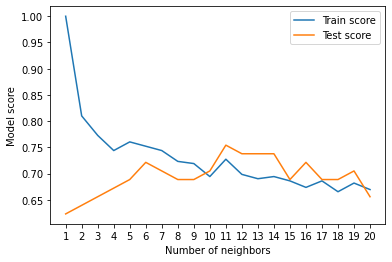

In [20]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## 6. Apply RandomizeSearchCV

In [21]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [22]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
RandomSearch_model = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
RandomSearch_model.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [23]:
RandomSearch_model.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [24]:
RandomSearch_model.score(X_test, y_test)

0.8852459016393442

In [25]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
RFC = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
RFC.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [26]:
RFC.score(X_test, y_test)

0.8688524590163934

In [27]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


# 7. Evaluate accuracy

In [28]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

## 7.1 ROC curve

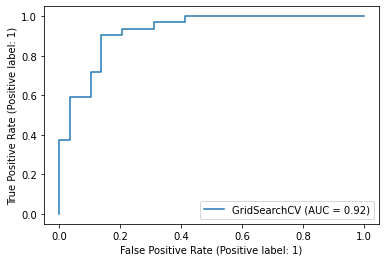

In [29]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

## 7.2 Confusion Metrics

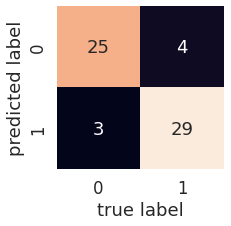

In [30]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

## 7.3 Classification Report

In [31]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## 7.3 Corss validation Score

In [32]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

## 7.3.1 Corss validation Accuracy score

In [33]:
cross_validation_score_accuracy = cross_val_score(clf,
                                                  X,
                                                  y,
                                                  cv = 5,
                                                  scoring = 'accuracy')

## 7.3.2 Corss validation Precision score

In [34]:
cross_validation_score_precision = cross_val_score(clf,
                                                  X,
                                                  y,
                                                  cv = 5,
                                                  scoring = 'precision')

## 7.3.3 Corss validation Recall score

In [35]:
cross_validation_score_recall = cross_val_score(clf,
                                                  X,
                                                  y,
                                                  cv = 5,
                                                  scoring = 'recall')

## 7.3.4 Corss validation F1 score

In [36]:
cross_validation_score_f1 = cross_val_score(clf,
                                                  X,
                                                  y,
                                                  cv = 5,
                                                  scoring = 'f1')

## 7.4 Visualizing cross-validated metrics

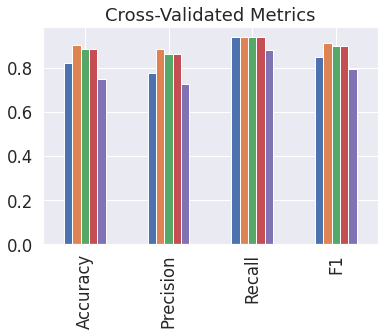

In [37]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cross_validation_score_accuracy,
                            "Precision": cross_validation_score_precision,
                            "Recall": cross_validation_score_recall,
                            "F1": cross_validation_score_f1})
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);